## Melbourne House Prices: Can you predict sale prices of houses in Melbourne?

### Initialize

In [1]:
import math
import pandas as pd

### Load Data

In [2]:
dfMlb = pd.read_csv('house_prices.csv')
dfMlb.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,RegionName,PropertyCount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [3]:
dfMlb.columns # Display all columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'Seller',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'RegionName', 'PropertyCount'],
      dtype='object')

### Select Data

In [4]:
# Select a prediction Target
y = dfMlb.loc[:,['Price']]

In [5]:
y.head()

,Price
0,1480000
1,1035000
2,1465000
3,850000
4,1600000


In [6]:
# Select Features
x = dfMlb.loc[:,['Rooms', 'Bathroom', 'Landsize','Lattitude', 'Longtitude']]

In [7]:
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


### Build Model
* 1. Define
* 2. Fit
* 3. Predict
* 4. Evaluate

In [8]:
# Define

from sklearn.tree import DecisionTreeRegressor
modelDtrMlb = DecisionTreeRegressor()

In [9]:
# Fit

modelDtrMlb.fit(x, y)

DecisionTreeRegressor()

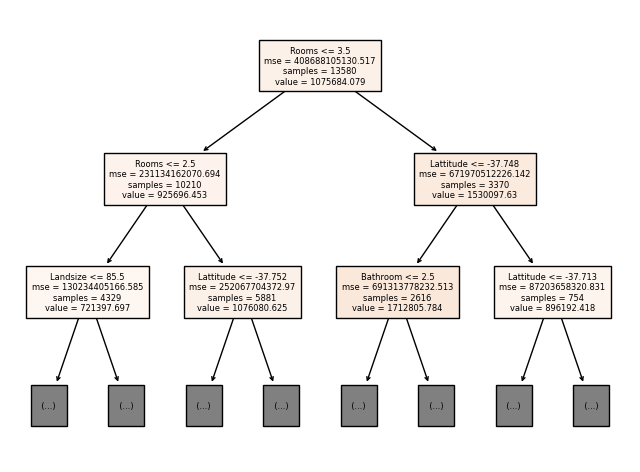

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(modelDtrMlb, max_depth=2, feature_names=x.columns, fontsize=6, filled=True)
plt.show()

In [11]:
# Predict

y_pred = modelDtrMlb.predict(x) # Predict for the first few rows

In [12]:
# Compare with the actual prices, which tells us we did a good prediction
y.head()

,Price
0,1480000
1,1035000
2,1465000
3,850000
4,1600000


In [13]:
# Evaluate how good our model is
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_pred) # = 1125.18, which says that the
# model predicts prices with an error of about a thousand USD

1125.1804614629357

### Separate Training set from Test set

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [19]:
# Rebuild decision tree model

# define
mdlDtrMlbSpl = DecisionTreeRegressor(random_state=1)

# fit
mdlDtrMlbSpl.fit(x_train, y_train)

# predict
y_test_pred = mdlDtrMlbSpl.predict(x_test)

# evaluate
mae = mean_absolute_error(y_test, y_test_pred)
print('MAE (after train-test-split):')
print(mae) # While our MAE is higher, it is more "honest"
avg_price = math.floor(dfMlb.Price.mean())
print("Current mae is ", mae/avg_price*100, "%")

MAE (after train-test-split):
238406.56130338734
Current mae is  22.163252526149627 %


### Improve Decision Tree model

In [16]:
def get_mae(X_trn, X_tst, y_trn, y_tst, mx_lf_nds):
    mdlDtrMlbDpt = DecisionTreeRegressor(random_state=1, max_leaf_nodes=mx_lf_nds)
    mdlDtrMlbDpt.fit(X_trn, y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_test, y_tst_prd)
    return mae

In [17]:
# Playing around with the depth of the tree, let's keep the one with lower MAE
for i in [5, 50, 500, 5000]:
    # This would let us explore which parameters are better (give a lower MAE)
    mae = get_mae(x_train, x_test, y_train, y_test, i)
    print('Max leaf nodes: ', i, '\t MAE', mae)

Max leaf nodes:  5 	 MAE 359783.60063327465
Max leaf nodes:  50 	 MAE 265943.7314522826
Max leaf nodes:  500 	 MAE 221352.9439085965
Max leaf nodes:  5000 	 MAE 238098.78862204644


### Build Random Forest model

In [18]:
from sklearn.ensemble import RandomForestRegressor

# define
mdlRfsMlb = RandomForestRegressor(random_state=1)

# fir
mdlRfsMlb.fit(x_train, y_train)

# predict
y_test_pred = mdlRfsMlb.predict(x_test)

# evaluate
mae = mean_absolute_error(y_test, y_test_pred)

print('MAE (Random Forest):')
print(mae)

<ipython-input-18-48e433b6edef>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdlRfsMlb.fit(x_train, y_train)


MAE (Random Forest):
182072.2203871561
